> 이번 챕터에서는 생성 AI의 가장 기본적인 개념인 언어 모델에 대해서 다룹니다.

# 10-01 언어 모델(Language Model)이란?

언어 모델(Language Model, LM): 언어라는 현상을 모델링 하고자 **단어 시퀀스(문장)에 확률을 할당하는 모델**

언어 모델을 만드는 방법은 크게 아래 2가지로 구분 가능
1. 통계를 이용한 방법
2. 인공신경망을 이용한 방법
    - GPT, BERT

> 이번 챕터에서는 언어 모델의 개념과 언어 모델의 전통적 접근 방식인 통계적 언어 모델에 대해 배움

## 1. 언어 모델(Language Model)

언어 모델: 단어 시퀀스에 확률을 할당(assign)하는 일을 하는 모델
- 풀어쓰면, 언어모델은 결국 가장 자연스러운 단어 시퀀스를 찾아내는 모델

확률을 할당하게 하기 위해서 가장 **보편적**으로 사용되는 방법은 **언어 모델이 이전 단어들이 주어졌을 때 다음 단어를 예측**하도록 하는 것

> **다른 유형의 언어모델**
- 주어진 양쪽의 단어들로부터 가운데 비어있는 단어를 예측하는 언어모델
- BERT챕터에서 다룸

언어 모델링(Language Modeling): 주어진 단어들로부터 아직 모르는 단어를 예측하는 작업
- 즉, **언어모델이 이전 단어들로부터 다음단어를 예측하는 일**은 언어모델링임

> (p.389)스탠포드 대학교에서는 언어 모델을 문법(grammer)라고 비유하기도 함. 언어 모델이 단어들의 조합이 얼마나 적절한지, 또는 해당 문장이 얼마나 적합한지를 알려주는 일을 하는 것이 마치 문법이 하는 일과 같기 때문.

## 2. 단어 시퀀스의 확률 할당

> 자연어 처리에서 단어 시퀀스에 확률을 할당하는 일이 왜 필요할까?

아래의 예시에서 `P`는 확률을 의미

### a. 기계 번역(Machine Translation):

```
P(나는 버스를 탔다) > P(나는 버스를 태운다)
```
언어 모델은 두 문장을 비교하여 좌측의 문장의 확률이 더 높다고 판단함.

### b. 오타 교정(Spell Correction):

```
선생님이 교실로 부리나케 __
P(달려갔다) > P(잘려갔다)
```
언어 모델은 두 문장을 비교하여 좌측의 문장의 확률이 더 높다고 판단함.

### c. 음성 인식(Speech Recognition):

```
P(나는 버스를 탔다) > P(나는 버스를 태운다)
```
언어 모델은 두 문장을 비교하여 좌측의 문장의 확률이 더 높다고 판단함.

즉, **언어모델은 확률을 통해 보다 적절한 문장을 판단**하기 때문에 단어 시퀀스에 확률을 할당하는 일이 필요함

## 3. 주어진 이전 단어들로부터 다음 단어 예측하기

언어 모델은 단어 시퀀스에 확률을 할당하는 모델.
- 단어 시퀀스에 확률을 할당하기 위해서 가장 보편적으로 사용하는 방법은 **이전 단어들이 주어졌을 때, 다음 단어를 예측하도록 하는 것**

이를 조건부 확률로 표현 가능

### A. 단어 시퀀스의 확률
하나의 단어: $w$

단어 시퀀스:대문자 $W$

$n$개의 단어가 등장하는 단어 시퀀스 $W$의 확률:
$$P(W) = P(w_1, w_2, w_3, w_4, w_5, ... , w_n)$$

- $P(A,B) = P(A \cap B)$

### B. 다음 단어 등장 확률

$|$: 조건부 확률(conditional probability) 기호

$n-1$개의 단어가 나열된 상태에서 $n$번째 단어의 확률:
$$P(w_n|w_1,...,w_{n-1})$$

***Example***

5번째 단어의 확률 = $P(w_5|w_1,w_2,w_3,w_4)$

***전체 단어 시퀀스의 확률***

전체 단어 시퀀스 W의 확률은 모든 단어가 예측되고 나서야 알 수 있음
- 따라서 **단어 시퀀스의 확률**은 아래와 같음

$$P(W) = P(w_1,w_2,w_3,w_4,w_5,...,w_n) = Π_{i=1}^{n}P(w_i|w_1,...,w_{i-1})$$

## 4. 언어모델의 간단한 직관

> ```비행기를 타려고 공항에 갔는데 지각을 하는 바람에 비행기를 [?]라는 문장이 있습니다.```

사람은 지식에 기반하여 나올 수 있는 여러 단어 후보들 중에서 '놓쳤다'라는 단어의 확률을 가장 높다고 판단하고, 해당 단어를 예상함.

기계 또한 비슷하게 앞에 어떤 단어들이 나왔는지 고려하여 **후보가 될 수 있는 여러 단어들에 대해서 등장확률을 추정해보고, 가장 높은 확률을 가진 단어를 선택**함.

## 5. 검색 엔진에서의 언어 모델의 예

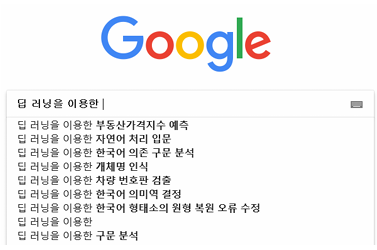

검색 엔진이 이전에 입력된 단어의 나열에 대해서 다음 단어를 예측하는 언어모델을 사용하고 있음

# 10-02 통계적 언어 모델과 N-gram 언어 모델

언어 모델의 전통적인 접근방법인 통계적 언어모델(Statistical Language Model)에 대해서알아봄
- 통계적 언어모델은 줄여서 **SLM**이라고 함

## 1. 조건부 확률

조건부 확률은 두 확률 P(A), P(B)에 대해서 아래와 같은 관계를 가짐
1. $P(B|A) = P(A,B) / P(A)$
2. $P(A,B) = P(A)P(B|A)$

<br>

***더 많은 확률에 대해서 일반화***

4개의 확률이 조건부 확률의 관계를 가질 때, 아래와 같이 표현 가능(구분을 위해 명시적으로 곱하기 `X`기호 추가)

$$P(A,B,C,D) = P(A)\times P(B|A) \times P(C|A,B) \times P(D|A,B,C)$$

이렇게 일반화 한 식을 **조건부 확률의 연쇄 법칙(chain rule)**이라고 함


<br>


***n개의 확률에 대해서 일반화***

$$P(x_1,x_2,x_3,...x_n) = P(x_1)P(x_2|x_1)P(x_3|x_1,x_2)...P(x_n|x_1,...,x_{n-1})$$


## 2. 문장에 대한 확률
***문제***

문장: An adorable little boy is spreading smiles
- 확률 $P(\text{An adorable little boy is spreading smiles})$를 식으로 표현해보자


***단어의 특징***

각 단어는 문맥이라는 관계로 인해 **이전 단어의 영향을 받아 나온** 단어다.
- 즉, **모든 단어로부터 하나의 문장이 완성**된다.
- 그렇기 때문에, **문장의 확률을 구하고자 할 때 조건부 확률을 사용**한다.

<br>

***문장의 확률***

앞서 언급한 조건부 확률의 일반화 식을 -> **문장의 확률 관점**으로 적어보면

문장의 확률 = 이전 단어가 주어졌을 때, 각 단어들이 다음 단어로 등장할 확률의 곱으로 구성됨


$$P(w_1,w_2,w_3,w_4,w_5,...,w_n) = Π_{n=1}^nP(w_n|w_1,...,w_{n-1})$$

즉, 문제의 문장에 해당 식을 적용하면 아래와 같음
```
P(An adorable little boy is spreading smiles)
= P(An) x P(adorable|An) x P(little|An adorable)
x P(boy|An adorable little) x P(is|An adorable little boy)
x P(spreading|An adorable little boy is)
x P(smiles|An adorable little boy is spreading)
```
문장의 확률을 구하기 위해서 각 단어에 대한 예측 확률들을 곱함.

## 3. 카운트 기반의 접근

> 즉, 문장의 확률을 구하기 위해서는 다음 단어에 대한 예측 확률을 모두 곱한다!

그렇다면 SLM은 이전단어로부터 다음 단어에 대한 확률은 어떻게(how) 구할까?
- 정답: **카운트에 기반하여 확률을 계산**한다.

***Example***

An adorable little boy가 나왔을 때, is가 나올 확률인 $P(\text{is|An adorable little boy})$를 구해보자.

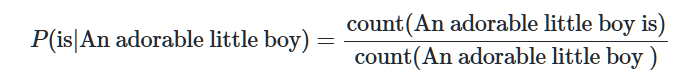

기계가 학습한 코퍼스 데이터에서 An adorable little boy가 100번 등장했는데, 그 다음에 is가 등장한 경우가 30번이라면
- 이 경우, $P(\text{is|An adorable little boy})$ = 30%

## 4. 카운트 기반 접근의 한계 - 희소 문제(Sparsity Problem)

현실에서도 Anadorable little boy가 나왔을 때, is가 나올 확률이라는 것이 존재함.
- 이를 실제 자연어의 확률 분포(또는 현실에서의 확률 분포)라고 명칭하자.

<br>

언어 모델의 목표: 기계에게 많은 코퍼스를 훈련 시켜서 언어모델을 통해 현실에서의 확률 분포를 근사하는 것
- 다만, 카운트 기반으로 접근하려하면 기계가 훈련해야하는 데이터(가지고 있는 코퍼스(corpus))은 방대한 양이 필요함.

***Example***

$P(\text{is|An adorable little boy})$를 구하는 경우를 가정하자.
- 기계가 훈련한 코퍼스에 `An adorable little boy is`라는 단어 시퀀스가 없었다면 -> 이 단어 시퀀스에 대한 확률은 0이 됨(분자가 0이므로)
- An adorable little boy라는 단어 시퀀스가 없었다면 -> 분모가 0이 되어 확률은 정의되지 않음.
- 그러나 이렇게 코퍼스에 단어 시퀀스가 없다고 해서 이 확률을 0 또는 정의되지 않는 확률이라고 하는 것은 정확한 모델링 방법이 아님.(현실에서는 존재할 수도 있기 때문)
- 이와 같이 **충분한 데이터를 관측하지 못하여 언어를 정확히 모델링하지 못하는 문제**를 **희소 문제(sparsity problem)**이라 함.

<br>

***희소문제의 완화 방법***
- n-gram 언어 모델
- 스무딩, 백오프와 같은 여러가지 일반화(generalization) 기법
- 다만, 이러한 방법들도 희소 문제에 대한 근본적인 해결책은 되지 못함.
    - 이러한 한계로 인해 언어 모델의 트렌드는 통계적 언어 모델에서 -> 인공 신경망 언어 모델로 넘어감


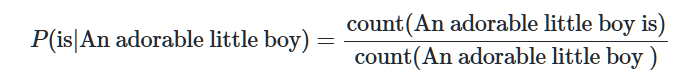

## 5. N-gram 언어 모델

n-gram 언어 모델은 **여전히 카운트에 기반한 통계적 접근을 사용**하고 있으므로, SLM의 일종
- 단, 이전에 등장한 모든 단어를 고려하는 것이 아니라, **일부 단어만 고려하는 접근 방법을 사용함**
- **n-gram에서의 n이 가지는 의미**: **일부 단어를 몇 개 보느냐**를 결정함.

### 1) N-gram 언어 모델의 접근 방법

***SLM의 한계***
1. 훈련 코퍼스에 확률을 계산하고 싶은 문장이나 단어가 없을 수 있다.
2. 확률을 계산하고 싶은 문장이 길어질수록 갖고 있는 코퍼스에서 그 문장이 존재하지 않을 가능성이 높다.

즉, 카운트할 수 없을 가능성이 높다.
- 아래의 예시와 같이 참고하는 단어들을 줄이면 카운트를 할 수 있을 가능성을 높일 수 있다.

<br>

***Example***

An adorable little boy가 나왔을 때 is가 나올 확률을 -> boy가 나왔을 때, is가 나올 확률로 생각해보자.

$$P(\text{is|An adorable little boy}) ≈ P(\text{is|boy})$$

위의 식이 지나친 일반화로 느껴질 시, little boy가 나왔을 때 is가 나올 확률로 생각하는 것도 대안임.

$$P(\text{is|An adorable little boy}) ≈ P(\text{is|little boy})$$


- 즉, 단어의 확률을 구하고자 기준 단어의 앞 단어를 전부 포함해서 카운트 하는 것이 아니라, **앞 단어 중 임의의 개수만 포함해서 카운트하여 근사하자는 것.**
- 이렇게 하면 **갖고 있는 코퍼스에서 해당 단어의 시퀀스를 카운트할 확률이 높아짐**


### 2) N-gram
임의의 개수를 정하기 위한 기준을 위해 사용하는 것이 n-gram.

n-gram: 연속적인 단어 나열을 의미함.
- 갖고 있는 코퍼스에서 **n개의 단어 뭉치로 끊어서 이를 하나의 토큰으로 간주**할 것.

***Example***

예를 들어서 문장 `An adorable little boy is spreading smiles`이 있을 때, 각 n에 대해서 n-gram을 전부 구해보면 다음과 같음.

```
unigrams : an, adorable, little, boy, is, spreading, smiles

bigrams : an adorable, adorable little, little boy, boy is, is spreading, spreading smiles

trigrams : an adorable little, adorable little boy, little boy is, boy is spreading, is spreading smiles

4-grams : an adorable little boy, adorable little boy is, little boy is spreading, boy is spreading smiles
```
- n=1: 유니그램(unigram), 1-gram
- n=2: 바이그램(bigram), 2-gram
- n=3: 트라이그램(trigram), 3-gram
- n=4이상: gram 앞에 그대로 숫자를 붙여서 명명함.


***n-gram을 이용하는 언어 모델에서 다음에 나올 단어의 예측***

n-gram을 통한 언어 모델에서 다음에 나올 단어의 예측은 **오직 n-1개의 단어에만 의존**함.

만약 `An adorable little boy is spreading` 다음에 나올 단어를 예측하고 싶다고 하자. (n=4로 4-gram을 이용한 언어모델 사용을 가정함)
- 이 경우, spreading 다음에 올 단어를 예측하는 것은, n-1에 해당되는 앞의 3개의 단어만을 고려함.
    - 4-gram이므로 4개의 단어가 하나의 토큰. 한칸은 예측해야되는 단어이므로, 앞의 3개(n-1개)만을 봐야하는 것

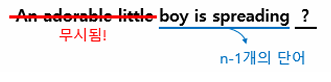

***Example***

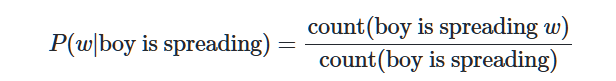

- 갖고 있는 코퍼스에서 `boy is spreading`이 1000번 등장했다고 가정하자.
- `boy is spreading insults`가 500번 등장시 -> boy is spreading 다음에 insults가 등장할 확률 = 50%
- `boy is spreading smiles`가 200번 등장시 -> boy is spreading 다음에 smiles가 등장할 확률 = 20%


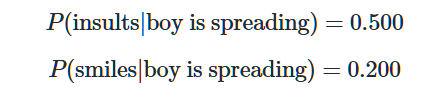

- 이경우, insults가 더 맞다고 판단함.

### 3) N-gram Language Model의 한계
1. n-gram은 앞의 단어 몇개만 보다 보니 의도하고 싶은 대로 문장을 끝맺음하지 못하는 경우가 생긴다.
    - 원래문장이 boy is spreading smiles였지만, 수식어구(an adorable little; 작고 사랑스러운)를 반영하지 않았기 때문에, insults로 예측함
    - 즉, 전체 문장을 고려한 언어 모델보다는 정확도가 떨어질 수밖에 없음.

2. 희소 문제(Sparsity Problem)
    - n-gram 언어모델도 여전히 **n-gram에 대한 희소 문제가 존재**한다.(n-gram에 대한 코퍼스 데이터가 부족한 경우 정확히 모델링하지 못한다.)

3. n을 선택하는 것은 trade-off 문제
    - 몇개의 단어를 볼지를 뜻하는 n을 정하는 것은 trade-off가 존재함.
        - trade-off: 두개의 대안 중 어느 하나를 실행하여 그 대안의 성과를 추구하면 다른 하나의 성과가 줄어드는 것
    - n을 크게 선택하면
        - 실제 훈련 코퍼스에서 해당 n-gram을 카운트할 수 있는 확률이 적어지므로 희소문제가 심각해짐
        - 모델의 사이즈가 커짐(기본적으로 코퍼스의 모든 n-gram에 대해서 카운트를 해야하기 때문)
    - n을 작게 선택하면
        - 훈련 코퍼스에서 카운트는 잘되지만 근사의 정확도가 현실의 확률분포와 멀어짐.
    - trade-off문제로 인해 정확도를 높이려면 **n은 최대 5를 넘게 잡아서는 안된다고 권장**됨.

***n이 성능에 영향을 주는 것을 확인할 수 있는 예제.***
> 탠퍼드 대학교의 공유 자료에 따르면, 월스트리트 저널에서 3,800만 개의 단어 토큰에 대하여 n-gram 언어 모델을 학습하고, 1,500만 개의 테스트 데이터에 대해서 테스트를 했을 때 다음과 같은 성능이 나왔다고 합니다. 뒤에서 배우겠지만, **펄플렉서티(perplexity)는 수치가 낮을수록 더 좋은 성능**을 나타냅니다.

|  |Unigram|Bigram|Trigram|
|--|--|--|--|
|**Perplexity**|962|170|109|

n을 1에서 2, 2에서 3으로 올릴때마다 성능이 올라감(펄플렉서티의 수치가 낮아짐)

***N-gram Language Model의 한계점 극복 방안***
- 분모, 분자에 숫자를 더해서 카운트했을 때 0이 되는 것을 방지하는 등의 여러 일반화(generalization) 방법들이 존재함.
- 하지만, 본질적으로 n-gram 언어모델에 대한 취약점을 완전히 해결하지는 못함
- 이에 대한 대안으로 N-gram Language Model보다 -> 대체로 성능이 우수한 인공 신경망을 이용한 언어모델이 많이 사용됨

# 10-03 펄플렉서티(Perplexity, PPL)
두 개의 모델 A, B가 있을 때 **모델의 성능은 어떻게 비교할 수 있을까?**

- 모델에게 작업을 시켜보고 해당 작업의 정확도를 통해 성능을 비교할 수 있음
    - 단 이렇게 하면 시간과 비용이 너무 많이 듦

위와 같은 방식보다는 테스트 데이터에 대해서 빠르게 식으로 계산되는 더 간단한 평가방법인 펄플렉서티(perplexity)가 존재.

**펄플렉서티(perplexity)**: 모델 내에서 자신의 성능을 수치화하여 결과를 내놓는 방법

## 1. 언어 모델의 평가 방법(Evaluation metric): PPL

펄플렉서티(perplexity)는 언어모델을 평가하기 위한 평가지표
- 보통 줄여서 PPL이라고 표현함.

<br>

***왜 perplexity라는 용어를 사용했을까?***

영어에서 'perplexed': '헷갈리는'과 유사한 의미
- 즉, PPL을 '헷갈리는 정도'로 이해할 수 있음.

**중요!**: PPL은 수치가 높으면 좋은 성능을 의미하는 것이 아니라, '낮을수록' 언어모델의 성능이 좋다.
- 헷갈리는 수치가 낮을수록 성능이 높을 것이기 때문

<br>
***PPL 식***

PPL은 **문장의 길이로 정규화된 문장 확률의 역수**이다.

문장 $W$의 길이가 $N$이라고 하였을 때, PPL은 아래와 같다.



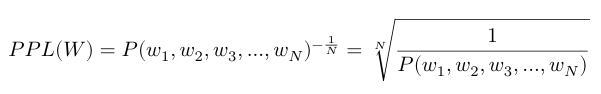

문장의 확률에 체인룰(chain rule)을 적용하면 아래와 같다

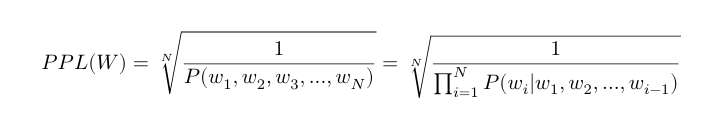

여기에 n-gram을 적용해볼 수도 있다. bigram 언어 모델의 경우에는 식이 아래와 같다.
- birgram이므로 앞의 n-1개(1개)의 단어만 고려

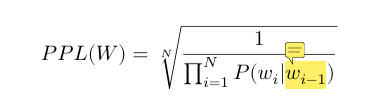

## 2. 분기 계수(Branching factor)

PPL은 선택할 수 있는 가능한 경우의 수를 의미하는 분기계수(branching factor)이다.
- 즉, PPL은 **이 언어 모델이** 특정 시점에서 평균적으로 **몇개의 선택지를 가지고 고민하고 있는지를 의미**한다.
    - 몇개를 '헷갈리는지'

<br>

***Example***

PPL이 10이 나왔다고 하자.
- 이 경우, 해당 언어 모델은 테스트 데이터에 대해서 **다음 단어를 예측하는 모든 시점(time step)마다 평균 10개의 단어를 가지고 어떤 것이 정답인지를 고민**하고 있다고 볼 수 있다.

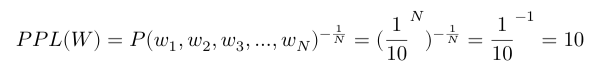


같은 테스트 데이터에 대해서 두 언어 모델을 각각 계산 후에 PPL의 값을 비교하면, 두 언어 모델 중 **PPL이 더 낮은**(헷갈리는 정도가 더 낮은) **언어 모델의 성능이 더 좋다**고 볼 수 있다.

***평가 방법에서 주의할 점***

- PPL의 값이 낮다는 것은 **테스트 데이터 상에서 높은 정확도를 보인다는 것이지**, 사람이 직접 느끼기에 좋은 언어모델이라는 것을 반드시 의미하지는 않는다.
- 또한, **PPL은 테스트 데이터에 의존**하므로 2개 이상의 언어 모델을 비교할 때에는
    1. 정량적으로 양이 많고,
    2. 도메인에 알맞은 동일한 테스트 데이터를 사용해야 신뢰도가 높다.

## 3. 기존 언어 모델 vs 인공신경망을 이용한 언어 모델

> 페이스북 AI 연구팀은 앞서 배운 n-gram 언어 모델과 이후 배우게 될 딥 러닝을 이용한 언어 모델에 대해서  
PPL로 성능 테스트를 한 표를 공개한 바 있음.  
ref: <https://engineering.fb.com/2016/10/25/ml-applications/building-an-efficient-neural-language-model-over-a-billion-words/>

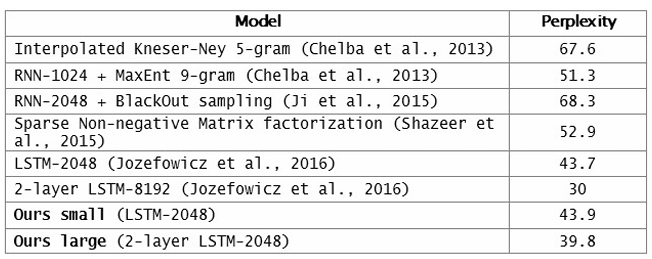

맨 윗줄의 언어모델이 n-gram을 이용한 언어모델 => PPL이 67.6
- 5-gram을 사용. Interpolated Kneser-Ney라는 이름이 붙었는데, 이는 일반화(generalization) 방법이 사용된 모델

그 아래 모델들이 인공신경망을 이용한 언어 모델들로, 대부분 n-gram을 이용한 언어 모델보다 더 좋은 성능 평가를 받음.